In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [39]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Assignment4/Live.csv")

In [40]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [42]:
data = data.drop(['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'], axis = 1)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [44]:
data['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [45]:
X = data.drop(['status_type'],axis = 1)
y = data[['status_type']]

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

LE = preprocessing.LabelEncoder()
y = LE.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


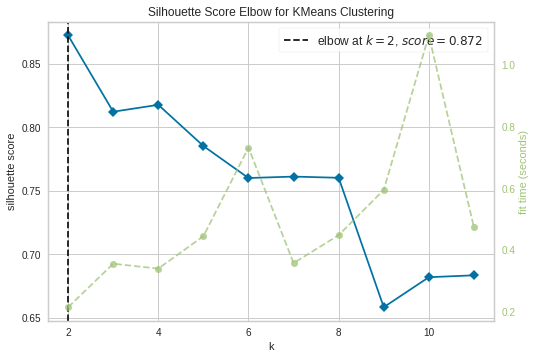

In [47]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state = 0)

visualizer = KElbowVisualizer(km, k = (2, 12), metric = 'silhouette')

visualizer.fit(X)
visualizer.show()
plt.show()

In [48]:
km = KMeans(n_clusters = 2,random_state=0)
y_pred = km.fit_predict(X)
data['cluster'] = y_pred

In [49]:
km.cluster_centers_

array([[2.24142278e+02, 1.22109857e+02, 3.08061948e+01, 2.11227529e+02,
        1.09083804e+01, 1.15298886e+00, 5.56809958e-01, 1.97423650e-01,
        9.63960052e-02],
       [5.22886525e+02, 5.23441844e+03, 4.91624113e+02, 4.02007092e+02,
        1.01921986e+02, 7.97163121e+00, 7.53900709e+00, 2.51063830e+00,
        9.36170213e-01]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


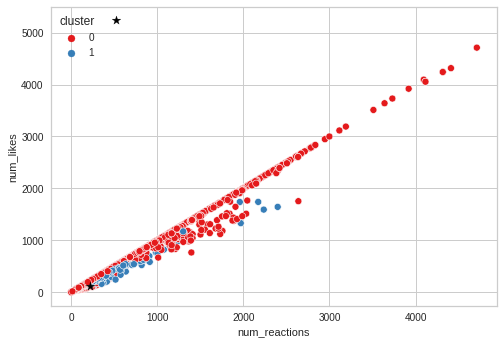

In [50]:
sb.scatterplot('num_reactions','num_likes', data=data, 
               hue=data['cluster'], 
               palette='Set1',legend='full')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
           marker='*',s=80,c='black')

## DBSCAN

In [61]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=3, min_samples=5)
cluster.fit(X)
set(cluster.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


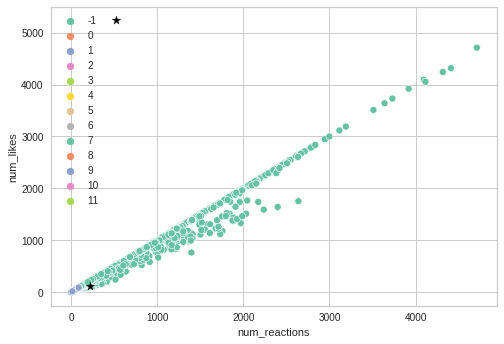

In [68]:
sp = sb.scatterplot('num_reactions','num_likes',data=data,
                    hue=cluster.labels_,palette='Set2',
                     legend='full')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
           marker='*',s=80,c='black')